        - Loading from:                 rte_case5_example/chronics/11/prod_p.csv.bz2
        - Loading from:                 rte_case5_example/chronics/11/load_p.csv.bz2
7.003472222222222


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


        - Loading from:                 l2rpn_2019_art/chronics/0867/_N_prods_p.csv.bz2
        - Loading from:                 l2rpn_2019_art/chronics/0867/_N_loads_p.csv.bz2
28.003472222222225


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


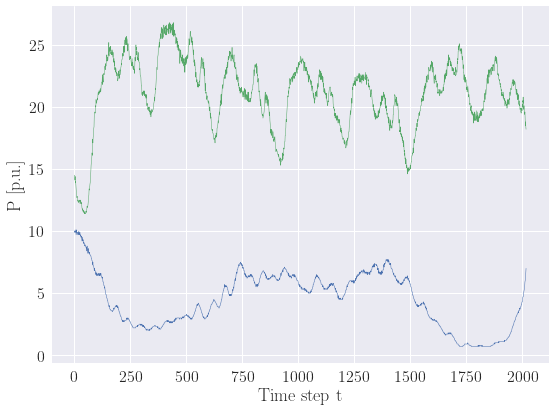

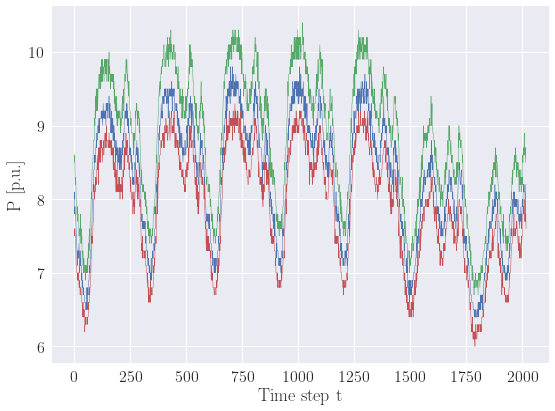

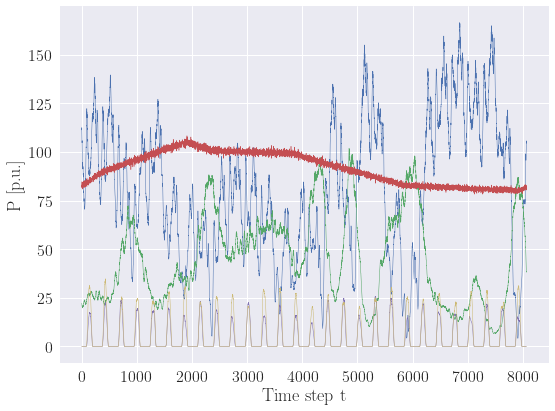

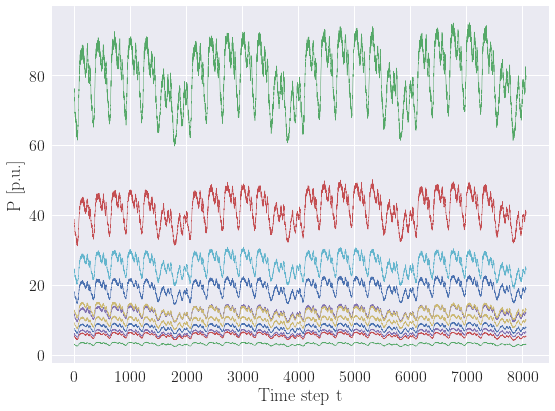

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lib.chronics import (
    is_prods_file,
    is_loads_file,
    read_bz2_to_dataframe,
)
from lib.constants import Constants as Const
from lib.data_utils import make_dir, env_pf
from lib.visualizer import Visualizer

Visualizer()


for case_name in ["rte_case5_example", "l2rpn_2019_art"]:
    case_path = os.path.join(Const.DATASET_DIR, case_name)
    case_chronics = os.path.join(case_path, "chronics")

    env_dc = True
    verbose = False

    results_dir = make_dir(os.path.join(Const.RESULTS_DIR, "final"))
    case_results_dir = make_dir(os.path.join(results_dir, f"{case_name}-{env_pf(env_dc)}"))

    np.random.seed(5)

    chronics = os.listdir(case_chronics)
    chronic_idx = np.random.randint(0, len(chronics), 1)[0]
    chronic = chronics[chronic_idx]

    chronic_dir = os.path.join(case_chronics, chronic)

    prods_file = [file for file in os.listdir(chronic_dir) if is_prods_file(file)]
    loads_file = [file for file in os.listdir(chronic_dir) if is_loads_file(file)]
    assert len(prods_file) == 1 and len(loads_file) == 1

    prods = read_bz2_to_dataframe(os.path.join(chronic_dir, prods_file[0]), sep=";")
    loads = read_bz2_to_dataframe(os.path.join(chronic_dir, loads_file[0]), sep=";")

    prods = prods.values
    loads = loads.values
    
    print((prods.shape[0] * 5) / 60.0 / 24.0)

    fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
    ax.plot(prods, linewidth=Const.LW)
    ax.set_xlabel("Time step t")
    ax.set_ylabel("P [p.u.]")
    fig.tight_layout()
    fig.savefig(os.path.join(case_results_dir, "sample-prods.pdf"))
    fig.show()

    fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
    ax.plot(loads, linewidth=Const.LW)
    ax.set_xlabel("Time step t")
    ax.set_ylabel("P [p.u.]")
    fig.tight_layout()
    fig.savefig(os.path.join(case_results_dir, "sample-loads.pdf"))
    fig.show()
    
    prods_diff = np.abs(np.divide(np.abs(prods[1:, :] - prods[:-1, :]), prods[1:, :] + 1e-8) * np.greater(prods[1:, :], 2).astype(np.float)).T 
    fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
    ax.hist(
        prods_diff.flatten(), lw=1.5, bins=20, histtype="step", density=True,
    )
    ax.set_xlabel(r"$\left| (P_g[t + 1] - P_g[t]) / P_g[t] \right|$")
    ax.set_ylabel("PDF")
    fig.tight_layout()
    fig.savefig(os.path.join(case_results_dir, "sample-prods-diff.pdf"))
    fig.show()


    loads_diff = np.abs(np.divide(np.abs(loads[1:, :] - loads[:-1, :]), loads[1:, :] + 1e-8) * np.greater(loads[1:, :], 1e-8).astype(np.float)).T 
    fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
    ax.hist(
        loads_diff.flatten(), lw=1.5, bins=20, histtype="step", density=True,
    )
    ax.set_xlabel(r"$\left| (P_l[t + 1] - P_l[t]) / P_l[t] \right|$")
    ax.set_ylabel("PDF")
    fig.tight_layout()
    fig.savefig(os.path.join(case_results_dir, "sample-loads-diff.pdf"))
    fig.show()

In [5]:
import os

import numpy as np

from experiments import ExperimentPerformance
from lib.agents import make_test_agent
from lib.constants import Constants as Const
from lib.data_utils import make_dir, env_pf
from lib.dc_opf import load_case, CaseParameters
from lib.run_utils import create_logger
from lib.visualizer import Visualizer

visualizer = Visualizer()

save_dir = make_dir(os.path.join(Const.RESULTS_DIR, "performance-aug-np"))

env_dc = True
verbose = False

for case_name in [
#     "rte_case5_example",
#     "rte_case5_example_art",
#     "l2rpn_2019",
    "l2rpn_2019_art",
]:
    case_save_dir = make_dir(os.path.join(save_dir, f"{case_name}-{env_pf(env_dc)}"))

    parameters = CaseParameters(case_name=case_name, env_dc=env_dc)
    case = load_case(case_name, env_parameters=parameters, verbose=verbose)

    experiment_performance = ExperimentPerformance(save_dir=case_save_dir)
    data = experiment_performance.compare_agents(case, save_dir=case_save_dir)


L2RPN_2019_ART (dc)


--------------------------------------------------------------------------------
                                        Loading Experience
--------------------------------------------------------------------------------
    - Loading chronics:                 ./results/performance-aug-np/l2rpn_2019_art-dc/agent-mip-chronic-****

--------------------------------------------------------------------------------
                                        Loading Experience
--------------------------------------------------------------------------------
    - Loading chronics:                 ./results/performance-aug-np/l2rpn_2019_art-dc/agent-multistep-mip-chronic-****

--------------------------------------------------------------------------------
                                        Loading Experience
--------------------------------------------------------------------------------
    - Loading chronics:                 ./results/performance-aug-np/l2rpn_2019_ar

In [6]:
from lib.action_space import is_do_nothing_action

for agent_name, agent_data in data.items():
    agent_chronics = list(agent_data.keys())
        
    agent_returns = []
    agent_rewards = []
    agent_labels = []
    agent_dones = []
    agent_t = []
    for chronic_idx, chronic_data in agent_data.items():
        chronic_return = chronic_data["total_return"]
        chronic_rewards = chronic_data["rewards"]
        chronic_labels = is_do_nothing_action(chronic_data["actions"], case.env)
        
        chronic_t = chronic_data["duration"]
        chronic_len = chronic_data["chronic_len"]
        chronic_done = chronic_t >= chronic_len
                
        agent_rewards.append(chronic_rewards)
        agent_labels.append(chronic_labels)
        agent_dones.append(chronic_done)
        agent_t.append(chronic_t)
        
#         if chronic_idx > 50:
#             break
    
    # Reward
    agent_rewards = np.hstack(agent_rewards)
    agent_mean_reward = np.mean(agent_rewards)
    agent_std_reward = np.std(agent_rewards)
    
    # Finished/all
    n_finished = np.sum(agent_dones)
    n_all = len(agent_dones)
    
    # Actions
    agent_t = np.array(agent_t)
    agent_total_labels = np.mean(np.hstack(agent_labels))
    
    agent_labels = np.array([np.sum(l) for l in agent_labels])
    agent_labels = np.divide(agent_labels, agent_t)
    agent_mean_labels = np.mean(agent_labels)
    agent_std_labels = np.std(agent_labels)
    
    info = [
        agent_name, 
        "${:.2f} \pm {:.2f}$".format(agent_mean_reward, agent_std_reward),
        "${}/{}$".format(int(n_finished), int(n_all)),
        "${:.2f} \%$".format(n_finished / n_all * 100),
        "${:.2f} \% \pm {:.2f} \%$".format(100 * agent_mean_labels, 100 * agent_std_labels),
        "${:.2f} \%$".format(100 * agent_total_labels.astype(float).mean())
    ]
    print("\t&\t".join(info) + r" \\")

agent-mip	&	$16.19 \pm 1.03$	&	$0/36$	&	$0.00 \%$	&	$41.44 \% \pm 12.59 \%$	&	$39.26 \%$ \\
agent-multistep-mip	&	$16.19 \pm 1.03$	&	$0/22$	&	$0.00 \%$	&	$52.52 \% \pm 6.38 \%$	&	$51.28 \%$ \\
do-nothing-agent	&	$16.46 \pm 0.87$	&	$7/35$	&	$20.00 \%$	&	$0.00 \% \pm 0.00 \%$	&	$0.00 \%$ \\



RTE_CASE5_EXAMPLE (ac)



Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



L2RPN_WCCI_2020 (ac)



Creating legend with loc="best" can be slow with large amounts of data.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


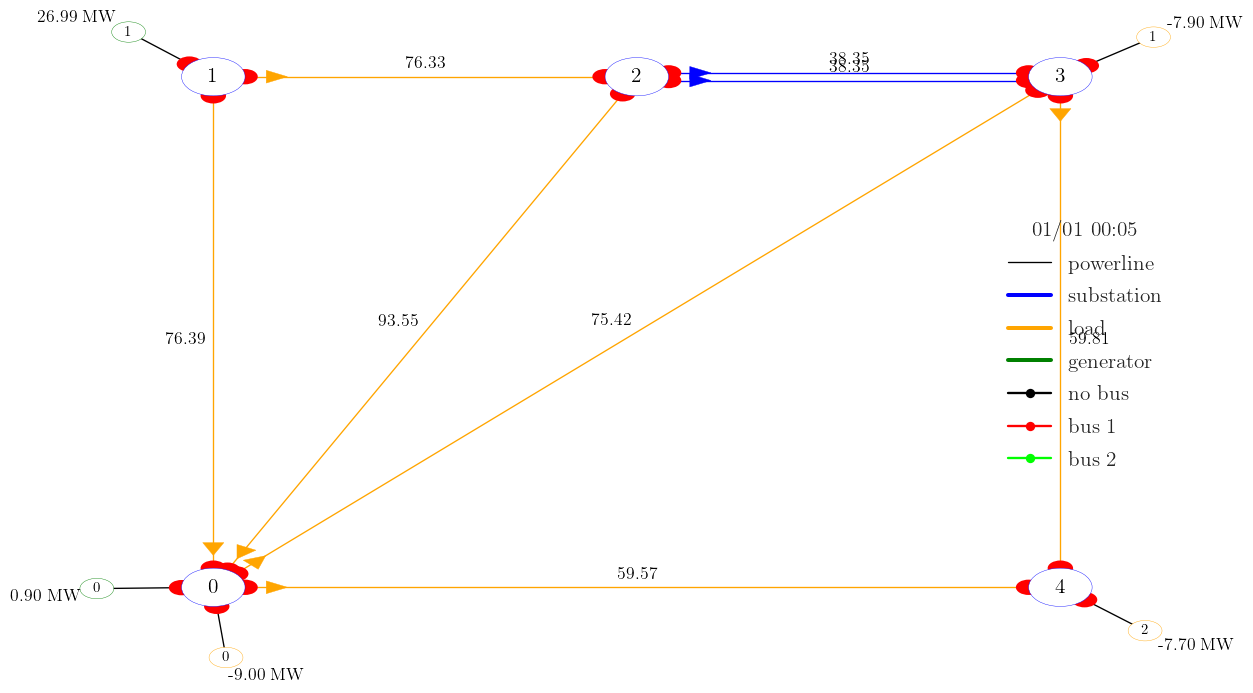

Creating legend with loc="best" can be slow with large amounts of data.


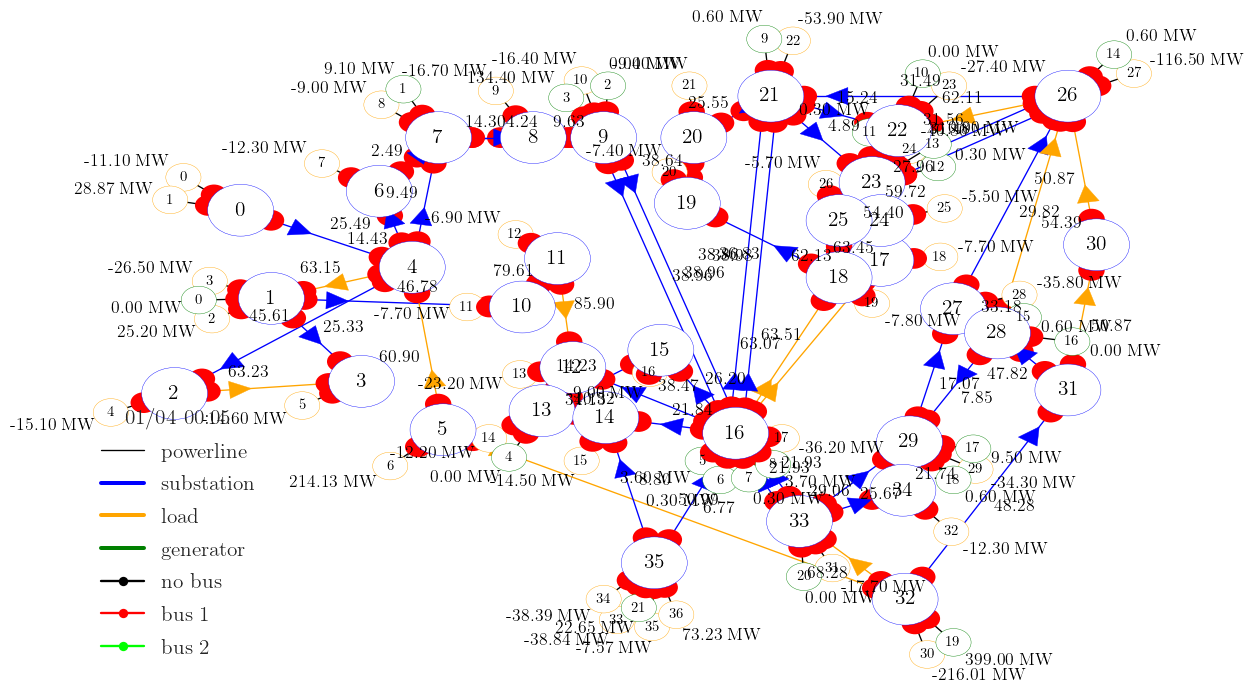

In [3]:
# DONE - VISUALIZE OTHER GRIDS
import numpy as np
import os
from lib.dc_opf import load_case, TopologyConverter
from lib.visualizer import pprint, Visualizer

# Visualizer()

for case_name in ["rte_case5_example", "l2rpn_wcci_2020"]:
    case = load_case(case_name)
    env = case.env

    obs = env.reset()
    
    fig = env.render()
    fig.tight_layout()
    fig.savefig(os.path.join("./results/final", case_name + "-sample-grid"))
    fig.show()

In [ ]:
import numpy as np
from lib.dc_opf import load_case, TopologyConverter
from lib.visualizer import pprint, Visualizer

Visualizer()

case_name = "l2rpn_2019"
case = load_case(case_name)
env = case.env
tc = TopologyConverter(env)

obs = env.reset()
topo_vect = np.ones((env.dim_topo, ), dtype=np.int)

pprint("    - topo:", topo_vect)
pprint("    - env:", env.current_obs.topo_vect)

sub_id = 4
sub_topo = np.array([1, 2, 1, 2, 1])
sub_mask = tc.substation_topology_mask[sub_id, :]
topo_vect[sub_mask] = sub_topo

obs.topo_vect = topo_vect
env.current_obs.topo_vect = topo_vect

load_bus = tc.load_to_sub_id + tc.n_sub * (topo_vect[tc.load_topo_pos] - 1)
mask = np.not_equal(load_bus, -1)
env.backend._grid.load["bus"][mask] = load_bus[mask]
env.backend._grid.load["in_service"] = mask

gen_bus = tc.gen_to_sub_id + tc.n_sub * (topo_vect[tc.gen_topo_pos] - 1)
mask = np.not_equal(gen_bus, -1)
env.backend._grid.gen["bus"][mask] = gen_bus[mask]
env.backend._grid.gen["in_service"] = mask

line_or_bus = tc.line_or_to_sub_id + tc.n_sub * (topo_vect[tc.line_or_topo_pos] - 1)
line_ex_bus = tc.line_ex_to_sub_id + tc.n_sub * (topo_vect[tc.line_ex_topo_pos] - 1)
mask = np.logical_or(np.not_equal(line_or_bus, -1), np.not_equal(line_ex_bus, -1))

print(env.backend._grid.line[["from_bus", "to_bus", "in_service"]])

env.backend._grid.line["from_bus"][mask] = line_or_bus[mask]
env.backend._grid.line["to_bus"][mask] = line_ex_bus[mask]
env.backend._grid.line["in_service"] = mask

print(env.backend._grid.line[["from_bus", "to_bus", "in_service"]])

pprint("line_or:", tc.lines_or_to_sub_bus(obs))
pprint("line_ex:", tc.lines_ex_to_sub_bus(obs))
pprint("load:", tc.loads_to_sub_bus(obs))
pprint("gen:", tc.gens_to_sub_bus(obs))

pprint("    - mask:", sub_mask.astype(np.int))
pprint("    - topo:", topo_vect)
pprint("    - env:", env.current_obs.topo_vect)

fig = env.render()


L2RPN_2019 (ac)

line_or:                                [ 1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  2]
line_ex:                                [ 1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  2  1]
load:                                   [1 1 1 1 1 1 1 1 1 1 1]
gen:                                    [1 1 1 1 1]
    - topo:                             [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  2  2  1  1  1  1]
    - env:                              [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  2  2  1  1  1  1]


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


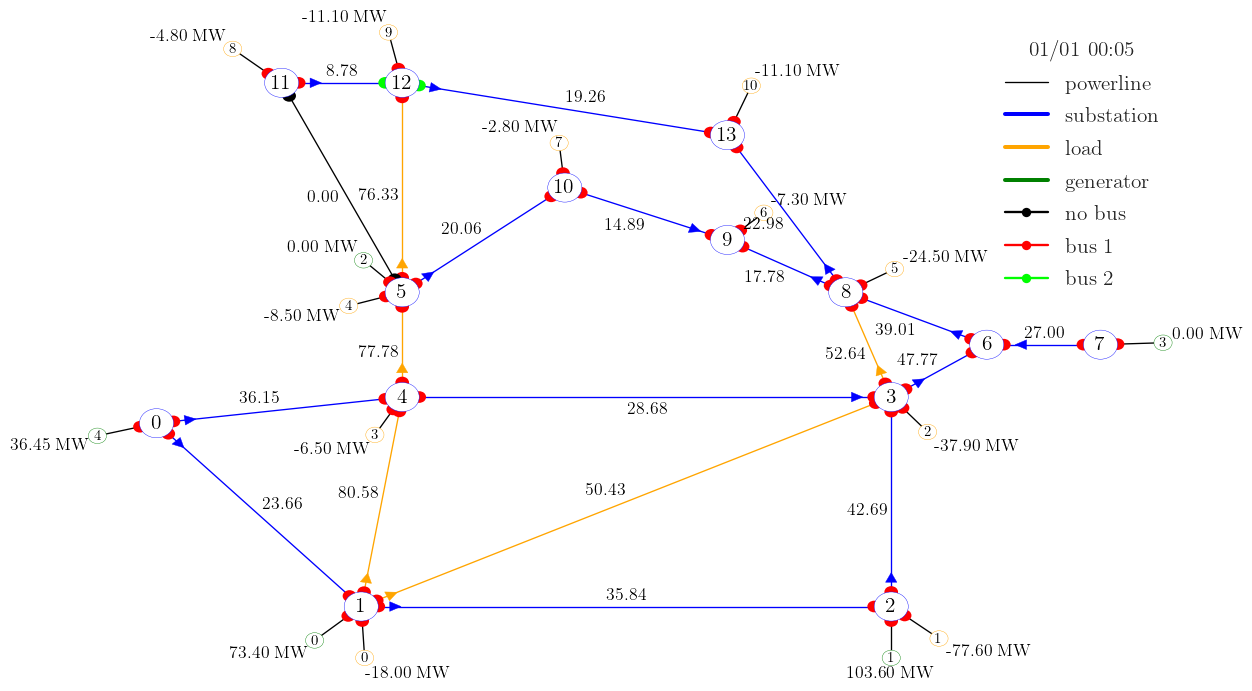

In [56]:
# DONE - OPTIMAL TOPOLOGY
import numpy as np
from lib.dc_opf import load_case, TopologyConverter
from lib.visualizer import pprint

case_name = "l2rpn_2019"
case = load_case(case_name)
env = case.env
tc = TopologyConverter(env)

obs = env.reset()
obs = env.reset()

opt_topo_str = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 2 2 1 1 1 1"
topo_vect = np.array(opt_topo_str.split(" ")).astype(int)

obs.topo_vect = topo_vect
env.current_obs.topo_vect = topo_vect

load_bus = tc.load_to_sub_id + tc.n_sub * (topo_vect[tc.load_topo_pos] - 1)
mask = np.not_equal(load_bus, -1)
env.backend._grid.load["bus"][mask] = load_bus[mask]
env.backend._grid.load["in_service"] = mask

gen_bus = tc.gen_to_sub_id + tc.n_sub * (topo_vect[tc.gen_topo_pos] - 1)
mask = np.not_equal(gen_bus, -1)
env.backend._grid.gen["bus"][mask] = gen_bus[mask]
env.backend._grid.gen["in_service"] = mask

line_or_bus = tc.line_or_to_sub_id + tc.n_sub * (topo_vect[tc.line_or_topo_pos] - 1)
line_ex_bus = tc.line_ex_to_sub_id + tc.n_sub * (topo_vect[tc.line_ex_topo_pos] - 1)
mask = np.logical_or(np.not_equal(topo_vect[tc.line_or_topo_pos], -1), np.not_equal(topo_vect[tc.line_ex_topo_pos], -1))

# print(env.backend._grid.line[["from_bus", "to_bus", "in_service"]])

env.backend._grid.line["from_bus"][mask] = line_or_bus[mask]
env.backend._grid.line["to_bus"][mask] = line_ex_bus[mask]
env.backend._grid.line["in_service"] = mask

obs.line_status = mask
obs.rho = mask.astype(np.float) * obs.rho
env.current_obs.rho = mask.astype(np.float) * env.current_obs.rho

# print(env.backend._grid.line[["from_bus", "to_bus", "in_service"]])

pprint("line_or:", tc.lines_or_to_sub_bus(obs))
pprint("line_ex:", tc.lines_ex_to_sub_bus(obs))
pprint("load:", tc.loads_to_sub_bus(obs))
pprint("gen:", tc.gens_to_sub_bus(obs))
pprint("    - topo:", topo_vect)
pprint("    - env:", env.current_obs.topo_vect)

env.step(env.action_space({}))

fig = env.render()
fig.tight_layout()
fig.savefig(os.path.join("./results/final/l2rpn_2019_art-dc", "sample-opt-topology.pdf"))
fig

In [ ]:
import os

from lib.action_space import ActionSpaceGenerator
from lib.constants import Constants as Const
from lib.data_utils import make_dir, env_pf
from lib.dc_opf import load_case
from lib.visualizer import Visualizer

Visualizer()

case_name = "l2rpn_2019"
env_dc = True
verbose = True

save_dir = make_dir(os.path.join(Const.RESULTS_DIR, "final"))
case_save_dir = make_dir(os.path.join(save_dir, f"{case_name}-{env_pf(env_dc)}"))

case = load_case(case_name, verbose=verbose)
env = case.env
action_space = env.action_space

actions_generator = ActionSpaceGenerator(env)
actions, actions_info = actions_generator.get_topology_action_set(verbose=verbose)

env.reset()

fig = env.render()
fig.savefig(os.path.join(case_save_dir, "sample_grid"))

action = action_space({"set_line_status": [(9, -1)]})
print(action)
env.step(action)
fig = env.render()
fig.savefig(os.path.join(case_save_dir, "sample_disconnection"))

action = action_space({
    "set_line_status": [(9, 1)],
    "set_bus": {"lines_or_id": [(9, 1)], "lines_ex_id": [(9, 1)]}
})
env.step(action)
print(action)
fig = env.render()
fig.savefig(os.path.join(case_save_dir, "sample_reconnection"))

action = action_space({
    "set_bus": {"substations_id": [(4, [1, 1, 2, 2, 1])]}
})
print(action)
env.step(action)
fig = env.render()
fig.savefig(os.path.join(case_save_dir, "sample_substation"))


L2RPN_2019_ART (dc)


--------------------------------------------------------------------------------
                                        Loading Experience
--------------------------------------------------------------------------------
    - Loading chronics:                 ./experience/data-aug/l2rpn_2019_art-dc/agent-mip-chronic-****
    - Number of loaded chronics:        122
    - Chronics:                         0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 120, 121, 122, 123, 124, 125, 126, 127, 128, 151, 152, 153, 154, 155, 156, 157, 158, 159


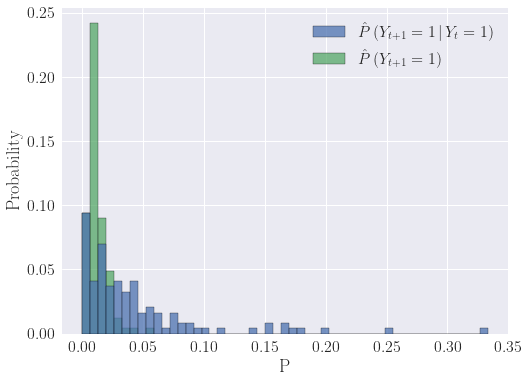

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from experience import load_experience
from lib.action_space import is_do_nothing_action
from lib.constants import Constants as Const
from lib.data_utils import (
    make_dir,
    env_pf,
)
from lib.visualizer import Visualizer, pprint

Visualizer()

experience_dir = make_dir(os.path.join(Const.EXPERIENCE_DIR, "data-aug"))
# experience_dir = make_dir(os.path.join(Const.RESULTS_DIR, "performance-sample"))
results_dir = make_dir(os.path.join(Const.RESULTS_DIR, "final"))

agent_name = "agent-mip"
case_name = "l2rpn_2019_art"
env_dc = True
verbose = False

case_results_dir = make_dir(os.path.join(results_dir, f"{case_name}-{env_pf(env_dc)}"))
case_results_dir = make_dir(os.path.join(case_results_dir, "analysis-iid"))
case, collector = load_experience(case_name, agent_name, experience_dir, env_dc=env_dc)

pprint("    - Chronics:", ", ".join(np.array(collector.chronic_ids, dtype=str)))

n_future = 1

for n in range(1, n_future + 1):
    cond_probs = []
    probs = []

    for chronic_idx, chronic_data in collector.data.items():
        chronic_Y = is_do_nothing_action(
            chronic_data["actions"], case.env, dtype=np.bool
        )

        chronic_len = len(chronic_Y)

        chronic_counts = []
        chronic_pos_ids = np.nonzero(chronic_Y)[0]
        for pos_idx in chronic_pos_ids:
            start_idx = pos_idx + 1
            end_idx = pos_idx + 1 + n

            if end_idx <= chronic_len:
                count = np.logical_and(
                    np.greater_equal(chronic_pos_ids, start_idx),
                    np.less_equal(chronic_pos_ids, end_idx),
                ).sum()
                chronic_counts.append(count)

        chronic_cond_prob = np.mean(chronic_counts)
        chronic_prob = np.greater(
            pd.DataFrame(chronic_Y[::-1]).rolling(n).mean()[(n - 1) :].values.flatten(),
            0,
        ).mean()

        cond_probs.append(chronic_cond_prob)
        probs.append(chronic_prob)

    cond_probs = np.array(cond_probs)
    probs = np.array(probs)

    if n == 1:
        str_ids = "{t + 1}"
    else:
        str_ids = f"t + 1 : t + {n}"
        str_ids = "{" + str_ids + "}"

    cond_probs_str = r"${}\left(Y_{} = 1 \,|\, Y_{} = 1 \right)$".format(
        r"\hat{P}", str_ids, "{t}"
    )
    probs_str = r"${}\left(Y_{} = 1\right)$".format(r"\hat{P}", str_ids, "{t}")

    fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
    sns.histplot(
        data={cond_probs_str: cond_probs, probs_str: probs,}, stat="probability", ax=ax
    )
    ax.set_xlabel("P")
    ax.set_ylabel(r"Probability")
    fig.savefig(os.path.join(case_results_dir, f"switching_cond_prob_pos-{n}"))

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from bclassification.utils_fc import (
    create_datasets,
    print_dataset,
)
from experience import load_experience
from lib.constants import Constants as Const
from lib.data_utils import (
    make_dir,
    env_pf,
)
from lib.visualizer import Visualizer, pprint

Visualizer()

# experience_dir = make_dir(os.path.join(Const.EXPERIENCE_DIR, "data-aug"))
experience_dir = make_dir(os.path.join(Const.RESULTS_DIR, "performance-aug"))
results_dir = make_dir(os.path.join(Const.RESULTS_DIR, "final"))

agent_name = "agent-mip"
case_name = "l2rpn_2019_art"
env_dc = True
verbose = False

case_results_dir = make_dir(os.path.join(results_dir, f"{case_name}-{env_pf(env_dc)}"))
case_results_dir = make_dir(os.path.join(case_results_dir, "visualization"))
case, collector = load_experience(case_name, agent_name, experience_dir, env_dc=env_dc)

pprint("    - Chronics:", ", ".join(np.array(collector.chronic_ids, dtype=str)))


L2RPN_2019_ART (dc)


--------------------------------------------------------------------------------
                                        Loading Experience
--------------------------------------------------------------------------------
    - Loading chronics:                 ./results/performance-aug/l2rpn_2019_art-dc/agent-multistep-mip-chronic-****
    - Number of loaded chronics:        21
    - Labels:                           (157180,)	3.013742206387581 %
    - Number of chronics:               21
    - Observations:                     157180


Creating legend with loc="best" can be slow with large amounts of data.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Converting input from bool to <class 'numpy.uint8'> for compatibility.
Converting input from bool to <class 'numpy.uint8'> for compatibility.


    - Line 9                            4	5	0.635 + 0.122
        - Critical:                     2138	1.360 % / 36.373 %
        - Overloaded:                   0	0.000 % / 0.000 %
    - Line 7                            3	6	0.554 + 0.203
        - Critical:                     1213	0.772 % / 20.636 %
        - Overloaded:                   2	0.001 % / 14.286 %
    - Line 8                            3	8	0.585 + 0.101
        - Critical:                     994	0.632 % / 16.911 %
        - Overloaded:                   1	0.001 % / 7.143 %


Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


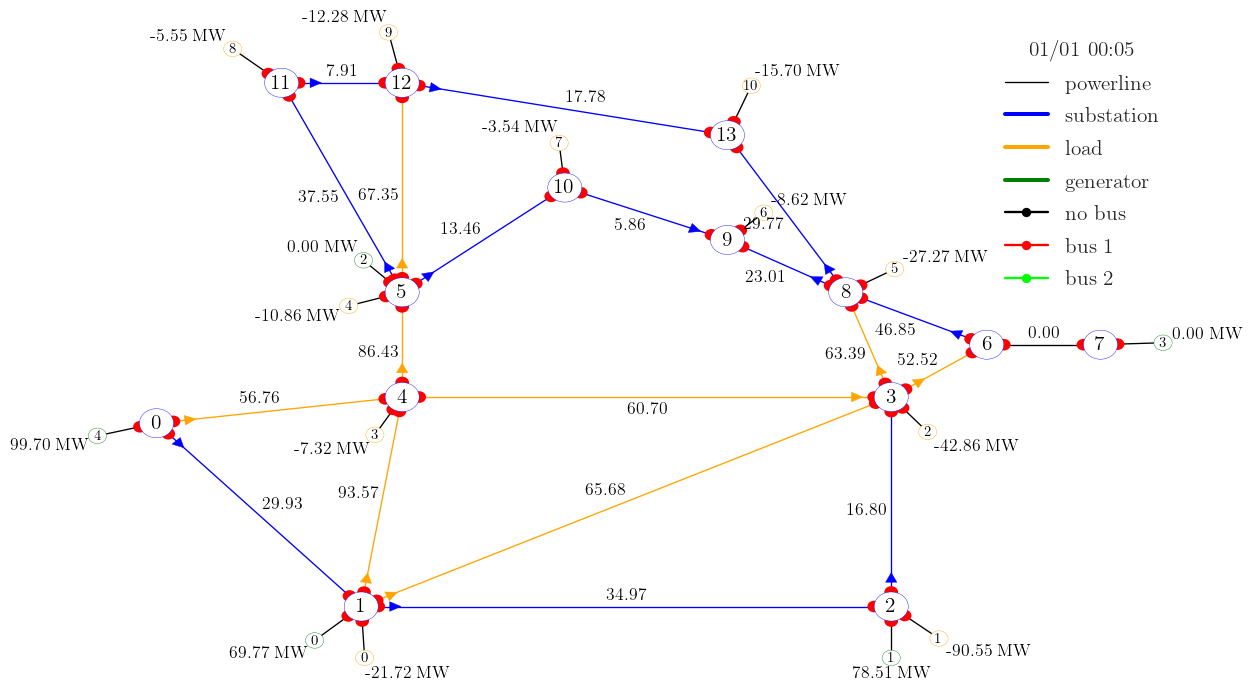

In [1]:
import os

import numpy as np

from experience import load_experience
from experiments import analyse_actions, analyse_loading, analyse_topologies
from lib.constants import Constants as Const
from lib.data_utils import make_dir, env_pf
from lib.visualizer import Visualizer, pprint

visualizer = Visualizer()

experience_dir = make_dir(os.path.join(Const.RESULTS_DIR, "performance-aug"))
results_dir = make_dir(os.path.join(Const.RESULTS_DIR, "final-analysis"))

case_name = "l2rpn_2019_art"

env_dc = True
verbose = False

case_results_dir = make_dir(os.path.join(results_dir, f"{case_name}-{env_pf(env_dc)}"))

for agent_name in [
#     "do-nothing-agent",
#     "agent-mip",
    "agent-multistep-mip",
]:

    case, collector = load_experience(
        case_name, agent_name, experience_dir, env_dc=env_dc
    )
    obses, actions, rewards, dones = collector.aggregate_data()

    if obses:
        labels = np.array(
            [action != case.env.action_space({}) for action in actions], dtype=np.float
        )

        pprint("    - Labels:", labels.shape, f"{100 * labels.mean()} %")
        pprint("    - Number of chronics:", dones.sum())
        pprint("    - Observations:", len(obses))

        """
            Action analysis
        """
        case.env.reset()
        fig = case.env.render()

        if agent_name != "do-nothing-agent":
            results_dir = make_dir(os.path.join(case_results_dir, "_analysis-actions"))
            analyse_actions(actions, case, agent_name, save_dir=results_dir)

        results_dir = make_dir(os.path.join(case_results_dir, "_analysis-loading"))
        analyse_loading(obses, case, agent_name, save_dir=results_dir)

        results_dir = make_dir(os.path.join(case_results_dir, "_analysis-topologies"))
        analyse_topologies(obses, case, agent_name, save_dir=results_dir)
        
    break

In [ ]:
"""
    TSNE
    
    Following: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
"""

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from bclassification.utils_base import (
    print_dataset,
    plot_feature_dist,
)
from bclassification.utils_fcn import create_dataset
from experience import load_experience
from lib.constants import Constants as Const
from lib.data_utils import (
    make_dir,
    env_pf,
)
from lib.visualizer import Visualizer, pprint

Visualizer()

# experience_dir = make_dir(os.path.join(Const.EXPERIENCE_DIR, "data-aug"))
experience_dir = make_dir(os.path.join(Const.RESULTS_DIR, "performance-aug"))
results_dir = make_dir(os.path.join(Const.RESULTS_DIR, "final"))

agent_name = "agent-mip"
case_name = "l2rpn_2019_art"
env_dc = True
verbose = False

case_results_dir = make_dir(os.path.join(results_dir, f"{case_name}-{env_pf(env_dc)}"))
case_results_dir = make_dir(os.path.join(case_results_dir, "visualization-fcn"))
case, collector = load_experience(case_name, agent_name, experience_dir, env_dc=env_dc)

pprint("    - Chronics:", ", ".join(np.array(collector.chronic_ids, dtype=str)))

In [ ]:
def plot_scatter(ax, data, color_label, marker_label=None, x_label=None, y_label=None, ax_title=None):
    colors = Const.COLORS
    
    color_values = sorted(data[color_label].unique())
    
    for i, color_val in enumerate(color_values):
        color_id = i % len(colors)
        color = colors[color_id]
        
        if marker_label:
            marker_values = sorted(data[marker_label].unique())
            for j, marker_val in enumerate(marker_values):
                d = data[np.logical_and(data[color_label] == color_val, data[marker_label] == marker_val)]

                if d.shape[0] > 0:
                    if marker_val == "1":
                        ax.scatter(d[x_label], d[y_label], label=str(color_val), s=50, marker="+", facecolors='none', c=color)
                    elif marker_val == "0":
                        ax.scatter(d[x_label], d[y_label], label=str(color_val), s=30, marker="o", facecolors='none', edgecolors=color, alpha=0.5)
                    else:
                        ax.scatter(d[x_label], d[y_label], label=str(color_val), s=30, marker="+", c=color)                
        else:
            d = data[data[color_label] == color_val]
            ax.scatter(d[x_label], d[y_label], label=str(color_val), s=30, marker="+", c=color)
            
    if len(color_values) < 3 and not marker_label:
        ax.legend(color_values)
        
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    if ax_title:
        ax.set_title(ax_title)

In [ ]:
"""
    Parameters
"""
random_seed = 0

n_window_targets = 0
n_window_history = 1
downsampling_rate = 0.10
use_actions = True
feature_scaling = True
val_frac = 0.10

for mode in ["structured", "binary", "lines"]:
    for n_window_forecasts in [0, 1]:
        if mode == "structured" or n_window_forecasts != 1:
            continue
            
        np.random.seed(random_seed)

        X, Y, mask_targets, X_all, Y_all = create_dataset(
            case,
            collector,
            input_mode=mode,
            label_mode="dn",
            n_window_history=n_window_history,
            n_window_targets=n_window_targets,
            downsampling_rate=downsampling_rate,
            n_window_forecasts=n_window_forecasts,
            use_actions=use_actions,
            feature_scaling=feature_scaling
        )

        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=val_frac, random_state=random_seed
        )

        mask_test_neg = np.logical_and(
            ~mask_targets, np.random.binomial(1, val_frac, mask_targets.size).astype(np.bool)
        )
        X_test = np.concatenate((X_val, X_all[mask_test_neg, :]))
        Y_test = np.concatenate((Y_val, Y_all[mask_test_neg]))

        print_dataset(X_all, Y_all, "All data")
        print_dataset(X, Y, "Data")
        print_dataset(X_train, Y_train, "Train")
        print_dataset(X_val, Y_val, "Validation")
        print_dataset(X_test, Y_test, "Test")

        # n_features = X.shape[1] // n_window_history if n_window_history != 0 else X.shape[1]
        # plot_feature_dist(
        #     X[:, :n_features],
        #     n_cols=4,
        #     n_rows=None,
        #     save_dir=case_results_dir,
        # )

        """
            PCA
        """
        
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(X_all)

        data = pd.DataFrame()
        data["pca-1"] = pca_result[:, 0]
        data["pca-2"] = pca_result[:, 1]
        data["y"] = Y_all.astype(int).astype(str)

        pprint("    - Explained variance:", pca.explained_variance_ratio_.sum())

        fig_name = f"pca-X_all-{mode}-for{n_window_forecasts}"
        fig_name = fig_name + "-ft" if feature_scaling else fig_name
        
        fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
        plot_scatter(ax, data, color_label="y", x_label="pca-1", y_label="pca-2")
        fig.savefig(os.path.join(case_results_dir, fig_name + ".png"))
        fig.show()
        
        data = pd.DataFrame()
        data["pca-1"] = pca_result[mask_targets, 0]
        data["pca-2"] = pca_result[mask_targets, 1]
        data["y"] = Y.astype(int).astype(str)

        fig_name = f"pca-X-{mode}-for{n_window_forecasts}"
        fig_name = fig_name + "-ft" if feature_scaling else fig_name
        
        fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
        plot_scatter(ax, data, color_label="y", x_label="pca-1", y_label="pca-2")
        fig.savefig(os.path.join(case_results_dir, fig_name + ".png"))
        fig.show()
        
        """
            TSNE

            Following: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
        """

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        
        # Dataset 
        pca = PCA(n_components=50)
        pca_result = pca.fit_transform(X_all)
        X_pca = pca_result[mask_targets, :]
        pprint("    - Explained variance:", pca.explained_variance_ratio_.sum())

        tsne_results = tsne.fit_transform(X_pca)

        data = pd.DataFrame()
        data["tsne-1"] = tsne_results[:, 0]
        data["tsne-2"] = tsne_results[:, 1]
        data["y"] = Y.astype(int).astype(str)

        fig_name = f"tsne-X-{mode}-for{n_window_forecasts}"
        fig_name = fig_name + "-ft" if feature_scaling else fig_name   
        
        fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
        plot_scatter(ax, data, color_label="y", x_label="tsne-1", y_label="tsne-2")
        fig.savefig(os.path.join(case_results_dir, fig_name + ".png"))
        fig.show()
        
        """
            TSNE Chronics
        """
        obses, *_ = collector.aggregate_data()
        data["chronic"] = np.repeat(collector.chronic_ids, collector.chronic_lengths)[mask_targets]
        data["rho"] = np.array([int(np.max(obs.rho) > 0.85) for obs in obses]).astype(str)[mask_targets]

        data_sum = np.array([np.sum(obs.prod_p) for obs in obses])
        data["sum"] = np.greater(data_sum, np.quantile(data_sum, 0.85)).astype(int).astype(str)[mask_targets]

        max_colors = 4
        nrows = int(np.ceil(len(collector.chronic_ids) / max_colors))
        ncols = 5
        j = 0

        fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 6 * nrows))
        for i in range(nrows):
            start = i * max_colors
            end = (i + 1) * max_colors

            start_chronic = collector.chronic_ids[start]
            if end > len(collector.chronic_ids):
                end = -1
            end_chronic = collector.chronic_ids[end]

            d = data[np.logical_and(start_chronic <= data["chronic"], data["chronic"] < end_chronic)]

            j = j + 1
            ax = plt.subplot(nrows, ncols, j,)
            plot_scatter(ax, d, color_label="chronic", x_label="tsne-1", y_label="tsne-2", ax_title="Chronics")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="chronic", marker_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching per chronic")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="rho", marker_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching per line loading")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="sum", marker_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching per ystem loading")

        fig.savefig(os.path.join(case_results_dir, fig_name + "-chronics" + ".png"))
        fig.show()

In [ ]:
"""
    Parameters
"""
random_seed = 0

n_window_targets = 0
n_window_history = 1
downsampling_rate = 0.10
use_actions = True
feature_scaling = True
val_frac = 0.10

label_mode = "sub-1"

for input_mode in ["structured", "binary", "lines"]:
    for n_window_forecasts in [0, 1]:
        if input_mode != "structured" or n_window_forecasts != 1:
            continue
            
        np.random.seed(random_seed)

        X, Y, mask_targets, X_all, Y_all = create_dataset(
            case,
            collector,
            input_mode=input_mode,
            label_mode=label_mode,
            n_window_history=n_window_history,
            n_window_targets=n_window_targets,
            downsampling_rate=downsampling_rate,
            n_window_forecasts=n_window_forecasts,
            use_actions=use_actions,
            feature_scaling=feature_scaling
        )
        
        X_train, X_val, Y_train, Y_val = train_test_split(
            X, Y, test_size=val_frac, random_state=random_seed
        )

        mask_test_neg = np.logical_and(
            ~mask_targets, np.random.binomial(1, val_frac, mask_targets.size).astype(np.bool)
        )
        X_test = np.concatenate((X_val, X_all[mask_test_neg, :]))
        Y_test = np.concatenate((Y_val, Y_all[mask_test_neg]))

        print_dataset(X_all, Y_all, "All data")
        print_dataset(X, Y, "Data")
        print_dataset(X_train, Y_train, "Train")
        print_dataset(X_val, Y_val, "Validation")
        print_dataset(X_test, Y_test, "Test")

        # n_features = X.shape[1] // n_window_history if n_window_history != 0 else X.shape[1]
        # plot_feature_dist(
        #     X[:, :n_features],
        #     n_cols=4,
        #     n_rows=None,
        #     save_dir=case_results_dir,
        # )

        """
            PCA
        """
        
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(X_all)

        data = pd.DataFrame()
        data["pca-1"] = pca_result[:, 0]
        data["pca-2"] = pca_result[:, 1]
        data["y"] = Y_all.astype(int).astype(str)

        pprint("    - Explained variance:", pca.explained_variance_ratio_.sum())

        fig_name = f"pca-X_all-{input_mode}-{label_mode}-for{n_window_forecasts}"
        fig_name = fig_name + "-ft" if feature_scaling else fig_name
        
        fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
        plot_scatter(ax, data, color_label="y", x_label="pca-1", y_label="pca-2")
        fig.savefig(os.path.join(case_results_dir, fig_name + ".png"))
        fig.show()
        
        data = pd.DataFrame()
        data["pca-1"] = pca_result[mask_targets, 0]
        data["pca-2"] = pca_result[mask_targets, 1]
        data["y"] = Y.astype(int).astype(str)

        fig_name = f"pca-X-{input_mode}-{label_mode}-for{n_window_forecasts}"
        fig_name = fig_name + "-ft" if feature_scaling else fig_name
        
        fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
        plot_scatter(ax, data, color_label="y", x_label="pca-1", y_label="pca-2")
        fig.savefig(os.path.join(case_results_dir, fig_name + ".png"))
        fig.show()
        
        """
            TSNE

            Following: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
        """

        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        
        # Dataset 
        pca = PCA(n_components=50)
        pca_result = pca.fit_transform(X_all)
        X_pca = pca_result[mask_targets, :]
        pprint("    - Explained variance:", pca.explained_variance_ratio_.sum())

        tsne_results = tsne.fit_transform(X_pca)

        data = pd.DataFrame()
        data["tsne-1"] = tsne_results[:, 0]
        data["tsne-2"] = tsne_results[:, 1]
        data["y"] = Y.astype(int).astype(str)

        fig_name = f"tsne-X-{input_mode}-{label_mode}-for{n_window_forecasts}"
        fig_name = fig_name + "-ft" if feature_scaling else fig_name   
        
        fig, ax = plt.subplots(figsize=Const.FIG_SIZE)
        plot_scatter(ax, data, color_label="y", x_label="tsne-1", y_label="tsne-2")
        fig.savefig(os.path.join(case_results_dir, fig_name + ".png"))
        fig.show()
        
        """
            TSNE Chronics
        """
        obses, *_ = collector.aggregate_data()
        data["chronic"] = np.repeat(collector.chronic_ids, collector.chronic_lengths)[mask_targets]
        data["rho"] = np.array([int(np.max(obs.rho) > 0.85) for obs in obses]).astype(str)[mask_targets]

        data_sum = np.array([np.sum(obs.prod_p) for obs in obses])
        data["sum"] = np.greater(data_sum, np.quantile(data_sum, 0.85)).astype(int).astype(str)[mask_targets]

        max_colors = 4
        nrows = int(np.ceil(len(collector.chronic_ids) / max_colors))
        ncols = 5
        j = 0

        fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 6 * nrows))
        for i in range(nrows):
            start = i * max_colors
            end = (i + 1) * max_colors

            start_chronic = collector.chronic_ids[start]
            if end > len(collector.chronic_ids):
                end = -1
            end_chronic = collector.chronic_ids[end]

            d = data[np.logical_and(start_chronic <= data["chronic"], data["chronic"] < end_chronic)]

            j = j + 1
            ax = plt.subplot(nrows, ncols, j,)
            plot_scatter(ax, d, color_label="chronic", x_label="tsne-1", y_label="tsne-2", ax_title="Chronics")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="chronic", marker_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching per chronic")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="rho", marker_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching per line loading")

            j = j + 1
            ax = plt.subplot(nrows, ncols, j)
            plot_scatter(ax, d, color_label="sum", marker_label="y", x_label="tsne-1", y_label="tsne-2", ax_title="Switching per system loading")

        fig.savefig(os.path.join(case_results_dir, fig_name + "-chronics" + ".png"))
        fig.show()

In [ ]:
        _, actions, *_ = collector.aggregate_data()
        Y_all = is_sub_set_action(actions, sub_id=1, env=case.env, dtype=np.int)
        Y = Y_all[mask_targets]